Multi Layer Perceptron for IRIS Flower Classification - Solving the Multi-class Classification Problem


Using Keras to Build ANN - MLP

In [47]:
from sklearn import datasets
import numpy as np
import pandas as pd

In [17]:
# import some data to play with
iris = datasets.load_iris()

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Dataset - Features and Target Labels

In [20]:
X = iris.data
y = iris.target

In [21]:
X.shape

(150, 4)

In [22]:
y.shape

(150,)

Multi-class Classifier - 3 class Labels

In [23]:
X= iris.data
y = iris.target # Multi-class Classifier

In [24]:
y = y.reshape(-1, 1)

print(y.shape)
print(y)

(150, 1)
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


In [25]:
from sklearn.preprocessing import OneHotEncoder
on = OneHotEncoder()
y_hot = on.fit_transform(y).toarray()
y_hot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

Splitting dataset into Training and Testing set

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y_hot, test_size=0.3, shuffle=True, stratify=y, random_state=101)

In [28]:
print('\n Shape of Training data : ', X_train.shape)
print('\n Shape of Test data : ', X_test.shape)


 Shape of Training data :  (105, 4)

 Shape of Test data :  (45, 4)


Standardize Data

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

Building the Multi Layer Perceptron Model

In [30]:
from keras.models import Sequential, Model
from keras.layers import Dense

In [31]:
## MODEL 
# Build a simple MLP model
model = Sequential()
model.add(Dense(5, input_dim=4, activation='sigmoid')) # first hidden layer with 5 neurons
model.add(Dense(3, activation='softmax')) # last layer with 3 output neurons - multi-class classification

# Compile MODEL 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 25        
                                                                 
 dense_1 (Dense)             (None, 3)                 18        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [33]:
from keras.utils import plot_model

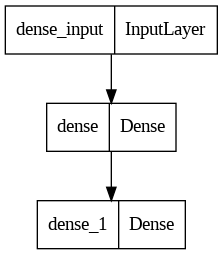

In [34]:
plot_model(model)

Initial Weights and Biases
Keras oficial documentation says....

kernel_initializer="glorot_uniform"

bias_initializer="zeros"

In [35]:
weights = model.get_weights()

In [36]:
weights

[array([[ 0.6037588 ,  0.23639834, -0.7011309 ,  0.05424422,  0.0862208 ],
        [ 0.35690272,  0.5324476 , -0.35203093,  0.22324789,  0.25954437],
        [-0.4516499 , -0.53067654,  0.2376113 ,  0.54659045, -0.18834007],
        [ 0.4236393 , -0.37450182, -0.2540999 ,  0.03898966,  0.67602575]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.14910764,  0.68146485, -0.7929804 ],
        [-0.5410464 ,  0.16805023, -0.72653335],
        [ 0.6588504 , -0.570498  ,  0.09457475],
        [ 0.6121109 ,  0.6141612 , -0.33094043],
        [-0.02461261,  0.00811636,  0.7188514 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32)]

Training the Model

In [38]:
history = model.fit(X_train_std, y_train, epochs=100, batch_size=16, validation_data=(X_test_std, y_test))

Epoch 1/100
7/7 [==============================] - 0s 26ms/step - loss: 0.6334 - accuracy: 0.8381 - val_loss: 0.6275 - val_accuracy: 0.8444
Epoch 2/100
7/7 [==============================] - 0s 30ms/step - loss: 0.6301 - accuracy: 0.8381 - val_loss: 0.6243 - val_accuracy: 0.8444
Epoch 3/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6269 - accuracy: 0.8381 - val_loss: 0.6212 - val_accuracy: 0.8444
Epoch 4/100
7/7 [==============================] - 0s 14ms/step - loss: 0.6237 - accuracy: 0.8381 - val_loss: 0.6181 - val_accuracy: 0.8444
Epoch 5/100
7/7 [==============================] - 0s 15ms/step - loss: 0.6207 - accuracy: 0.8381 - val_loss: 0.6150 - val_accuracy: 0.8444
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.6176 - accuracy: 0.8381 - val_loss: 0.6120 - val_accuracy: 0.8444
Epoch 7/100
7/7 [==============================] - 0s 32ms/step - loss: 0.6145 - accuracy: 0.8381 - val_loss: 0.6090 - val_accuracy: 0.8444
Epoch 8/100
7/7 [===

Post training Weights and biases

In [39]:
weights = model.get_weights()

In [40]:
weights

[array([[-0.00668213, -0.1935099 , -1.0673921 , -0.5933883 ,  0.54871833],
        [-0.44479075, -0.0774549 ,  0.6340175 ,  0.25584456, -0.62033373],
        [-1.110538  , -1.2295048 , -0.61987495, -0.21270317,  0.57614756],
        [-0.40581638, -1.3911281 , -1.0980726 , -0.7799756 ,  1.480653  ]],
       dtype=float32),
 array([ 0.02743044,  0.63263243, -0.9399442 , -0.15867673,  0.34690008],
       dtype=float32),
 array([[ 0.288483  ,  0.58856034, -0.908536  ],
        [ 0.17095429, -0.01657689, -1.7384303 ],
        [ 1.4454014 , -0.9569908 , -0.6664226 ],
        [ 0.7933318 ,  0.45221445, -0.42765832],
        [-1.1907811 ,  0.3501639 ,  1.4896927 ]], dtype=float32),
 array([-0.5397446 ,  0.07660513,  0.36761132], dtype=float32)]

Plot Loss/Accuracy Curve for Training and Validation Data

In [41]:
from keras.utils import plot_model
import matplotlib.pyplot as plt

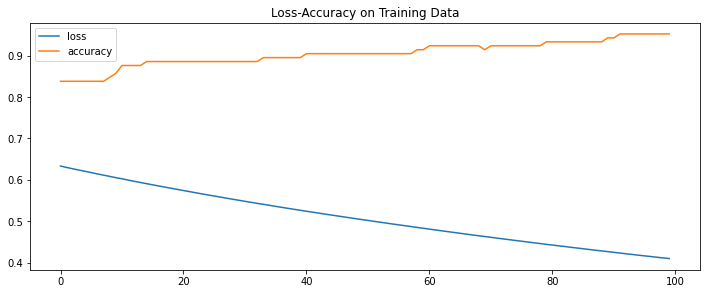

In [43]:
#Plotting loss/accuracy profile of the model on training data
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Training Data')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.legend()

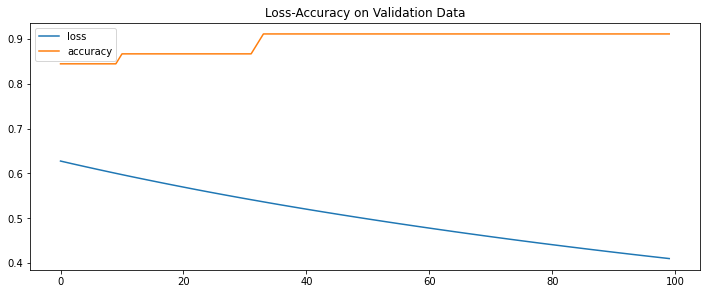

In [44]:
# Plot Loss/Accuracy Profile of the model on Test/Validation Data
plt.figure(figsize=(12,10))
plt.subplot(211)
plt.title('Loss-Accuracy on Validation Data')
plt.plot(history.history['val_loss'], label='loss')
plt.plot(history.history['val_accuracy'], label='accuracy')
plt.legend()

Testing/Making Predictions

In [45]:
# Actual predictions from the ANN are number between 0 and 1 (output of the Sigmoid activation)
pred = model.predict(X_test_std)
print(pred)

2/2 [==============================] - 0s 9ms/step
[[0.06606783 0.37929162 0.55464053]
 [0.02738592 0.23467769 0.7379363 ]
 [0.08159307 0.3984529  0.5199541 ]
 [0.85268134 0.14147696 0.00584166]
 [0.04706189 0.3285889  0.6243493 ]
 [0.05482869 0.39550382 0.54966754]
 [0.02589596 0.22543462 0.74866956]
 [0.05224931 0.3819762  0.56577444]
 [0.8519051  0.14184351 0.00625146]
 [0.13501461 0.45495123 0.4100341 ]
 [0.86408806 0.13012573 0.0057861 ]
 [0.86167955 0.1324833  0.00583707]
 [0.13745682 0.5325618  0.3299814 ]
 [0.8574916  0.13666835 0.00584009]
 [0.06011763 0.3784075  0.56147486]
 [0.03084607 0.24657294 0.72258085]
 [0.85597825 0.1364495  0.00757227]
 [0.85485554 0.13881367 0.00633087]
 [0.85249656 0.1418002  0.00570327]
 [0.03650606 0.27512562 0.68836826]
 [0.07004656 0.43093765 0.4990158 ]
 [0.2734708  0.61777914 0.10874997]
 [0.05475178 0.3753951  0.5698531 ]
 [0.12010581 0.5608459  0.3190483 ]
 [0.0277635  0.23670228 0.7355343 ]
 [0.07765379 0.44623223 0.47611392]
 [0.06849886 

Classification Metrics

In [46]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Accuracy

In [48]:
pred_labels = np.argmax(model.predict(X_test_std), axis=1)

2/2 [==============================] - 0s 6ms/step


In [49]:
true_labels = np.argmax(y_test, axis = 1)

In [51]:
acc = accuracy_score(true_labels, pred_labels) 
print(" Accuracy = ", round(acc *100, 2) , '%')

 Accuracy =  91.11 %


Classification Report

In [52]:
print(classification_report (true_labels, pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.73      0.85        15
           2       0.79      1.00      0.88        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



Confusion Matrix

In [53]:
print(confusion_matrix (true_labels, pred_labels))

[[15  0  0]
 [ 0 11  4]
 [ 0  0 15]]


Evaluating the model on Test dataset

In [54]:
results = model.evaluate(X_test_std, y_test)

print('Final test set loss {:4f}'.format(results[0]))
print('Final test set accuracy {:4f}'.format(results[1]))

2/2 [==============================] - 0s 10ms/step - loss: 0.4099 - accuracy: 0.9111
Final test set loss 0.409905
Final test set accuracy 0.911111


Verifying the Output with an Individual sample

In [60]:
#Actual predictions from the ANN are numbers between 0 and 1 (output of the Sigmoid activations)

idx = 12
individual_test_sample = X_test_std[idx,:].reshape(1,4)

print("\n Input sample Original:", X_test[idx,:].reshape(1,4))
print("\n Input sample Standardize:", individual_test_sample)

pred = model.predict(individual_test_sample)
print('\n Predicted value : ', pred)

print('\n Predicted label by the model : ', np.argmax(pred))

print('\n True/Actual Label : ', y_test[idx])


 Input sample Original: [[5.9 3.  4.2 1.5]]

 Input sample Standardize: [[ 0.06936532 -0.15936179  0.26058315  0.39001227]]
1/1 [==============================] - 0s 64ms/step

 Predicted value :  [[0.1374568  0.5325618  0.32998142]]

 Predicted label by the model :  1

 True/Actual Label :  [0. 1. 0.]
